In [93]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

In [94]:
bills = pd.read_csv('C:\\Users\\gcarvalho\\Desktop\\Data Science Content\\01 - Conteúdos\\Códigos\\Bases de dado\\tips.csv')

In [95]:
translate = {
    'total_bill': 'conta', 
    'tip': 'gorjeta',
    'dessert': 'sobremesa', 
    'day': 'dia', 
    'time': 'refeicao', 
    'size': 'pessoas'
}

gorjetas = bills.rename(columns=translate)
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [96]:
gorjetas.sobremesa = gorjetas.sobremesa.map({
    'No': 'Não',
    'Yes': 'Sim'
})
gorjetas.dia = gorjetas.dia.map({
    'Sun': 'Domingo', 
    'Sat': 'Sabado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
})
gorjetas.refeicao = gorjetas.refeicao.map({
    'Dinner': 'Jantar',
    'Lunch': 'Almoco'
})

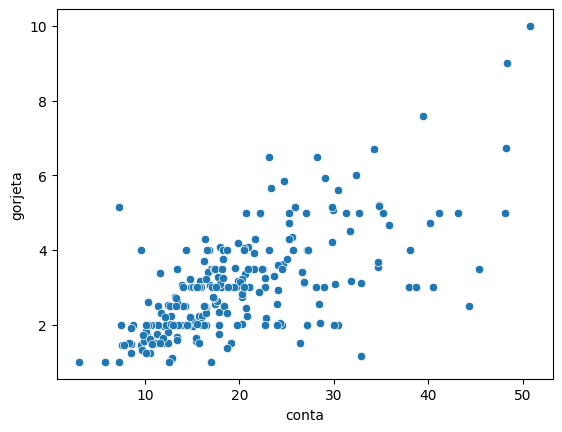

In [97]:
dotplot = sns.scatterplot(x='conta', y='gorjeta', data=gorjetas)

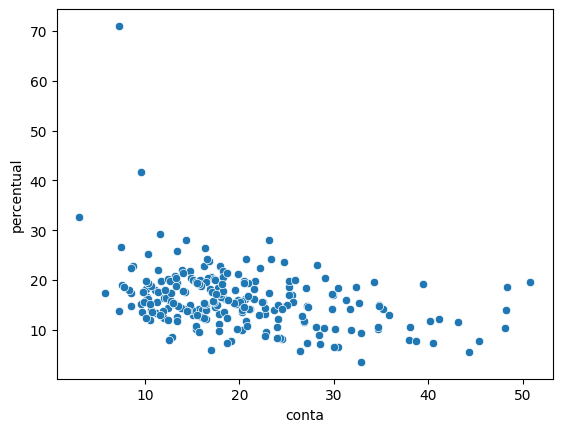

In [98]:
gorjetas['percentual'] = ((gorjetas.gorjeta / gorjetas.conta)*100).round(2)
proportions = sns.scatterplot(x='conta', y='percentual', data=gorjetas)

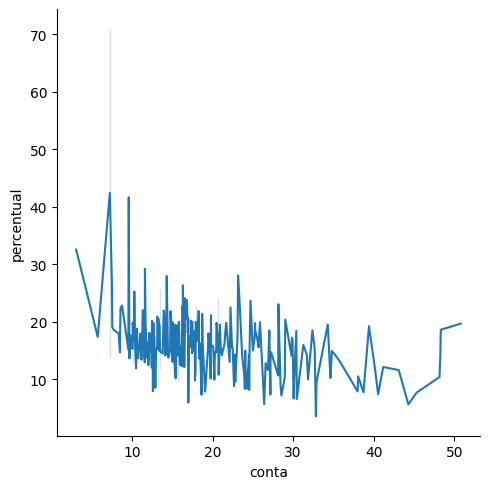

In [99]:
sns.relplot(x='conta', y='percentual', kind='line', data=gorjetas)

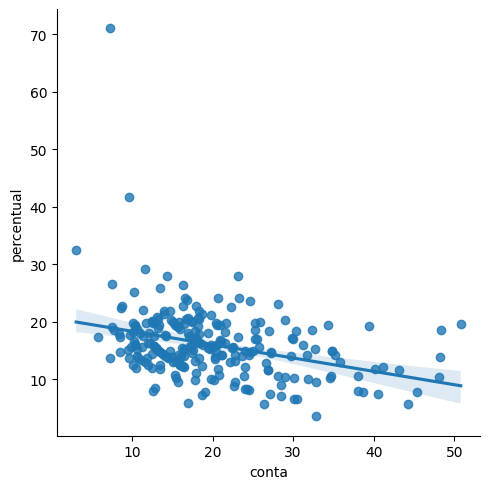

In [100]:
sns.lmplot(x='conta', y='percentual', data=gorjetas)

In [101]:
dotplot.set_title('Gorjeta x Conta')
dotplot.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta')

[Text(0.5, 24.0, 'Valor da Conta'),
 Text(24.000000000000007, 0.5, 'Valor da Gorjeta')]

In [102]:
dotplot = dotplot.get_figure()

In [103]:
dotplot.savefig('Gorjeta x Conta')

In [104]:
gorjetas[gorjetas.sobremesa =='Sim'].describe().round(2)

,conta,gorjeta,pessoas,percentual
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,16.32
std,9.83,1.40,0.81,8.51
min,3.07,1.00,1.00,3.56
25%,13.42,2.00,2.00,10.68
50%,17.92,3.00,2.00,15.38
75%,26.86,3.68,3.00,19.51
max,50.81,10.00,5.00,71.03


In [105]:
gorjetas[gorjetas.sobremesa =='Não'].describe().round(2)


,conta,gorjeta,pessoas,percentual
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,15.93
std,8.26,1.38,1.02,3.99
min,7.25,1.00,1.00,5.68
25%,13.32,2.00,2.00,13.69
50%,17.59,2.74,2.00,15.56
75%,22.76,3.50,3.00,18.50
max,48.33,9.00,6.00,29.20


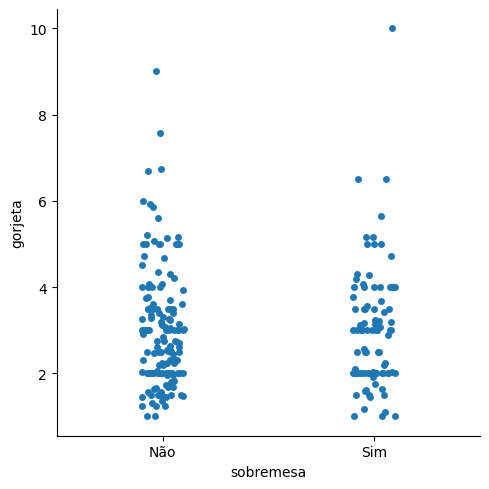

In [106]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

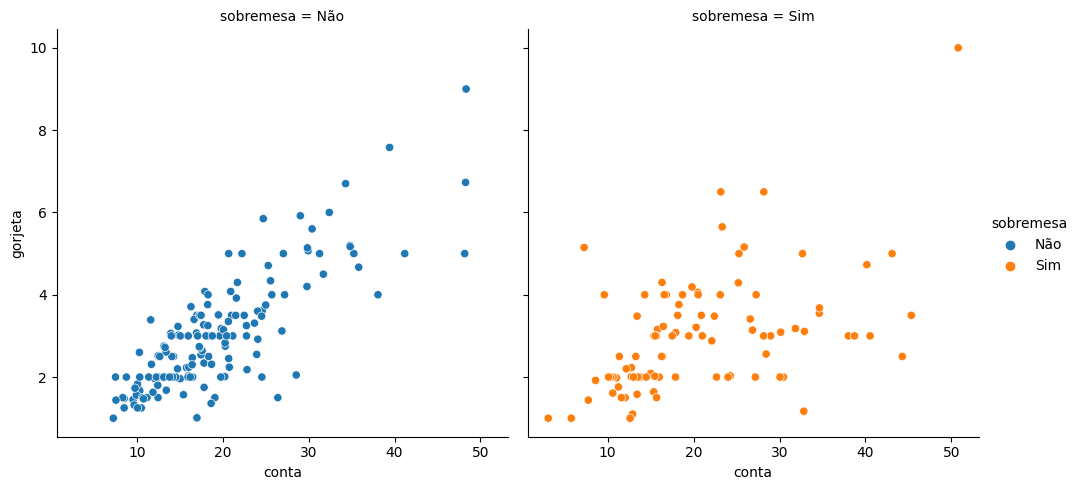

In [107]:
sns.relplot(
    x='conta',
    y='gorjeta',
    hue='sobremesa',
    col='sobremesa',
    data=gorjetas
)

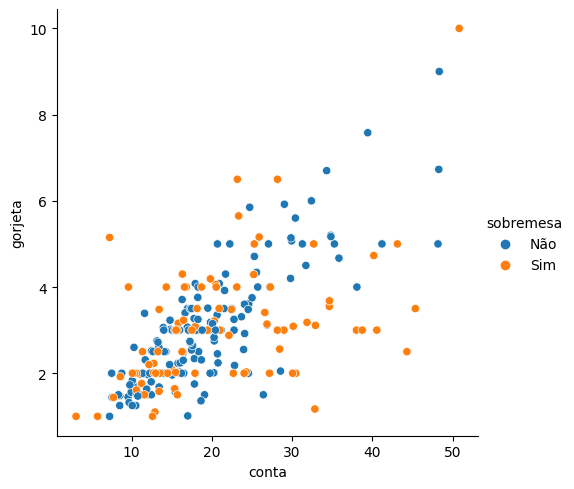

In [108]:
sns.relplot(
    x='conta',
    y='gorjeta',
    hue='sobremesa',
    data=gorjetas
)

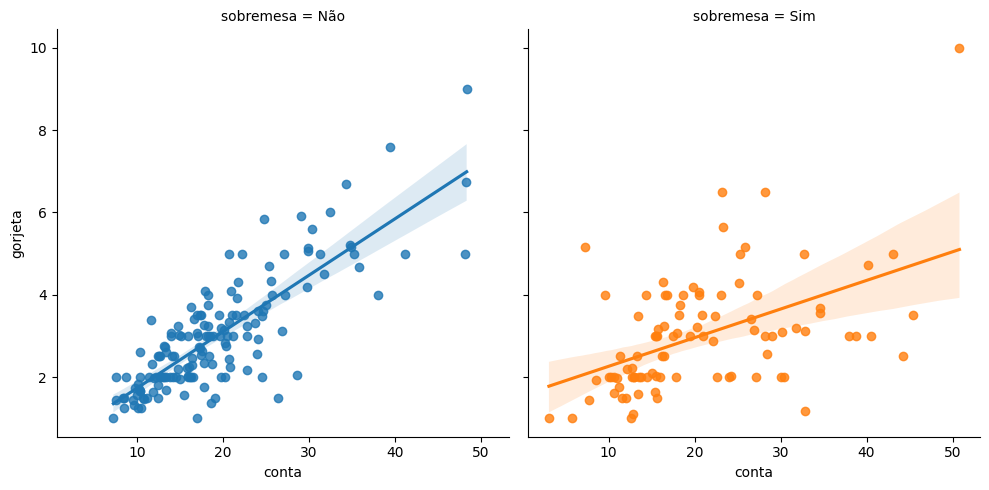

In [109]:
sns.lmplot(
    x='conta',
    y='gorjeta',
    hue='sobremesa',
    col='sobremesa',
    data=gorjetas
)

In [113]:
c_sob = gorjetas.query("sobremesa == 'Sim'").percentual
s_sob = gorjetas.query("sobremesa == 'Não'").percentual

In [116]:
ranksums(c_sob,s_sob)

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

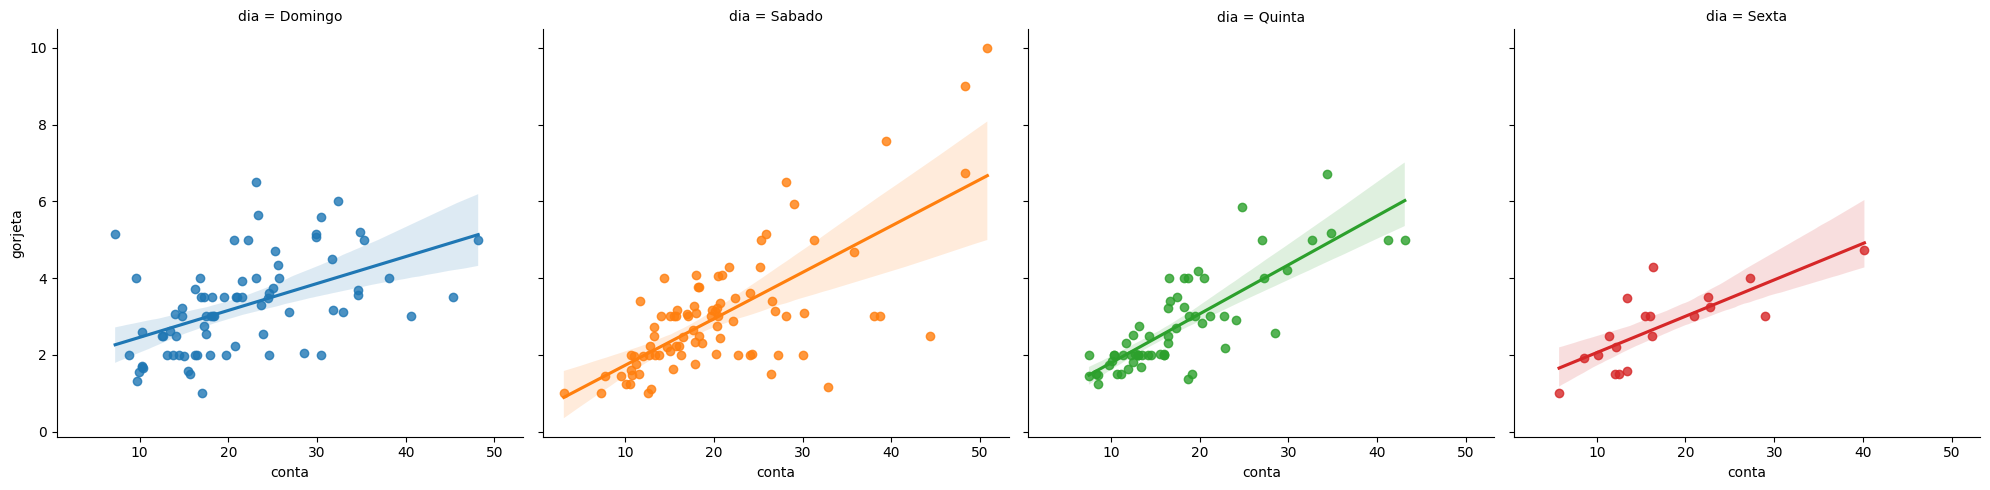

In [123]:
graficos_dias = sns.lmplot(
    x='conta',
    y='gorjeta',
    col='dia',
    hue='dia',
    data=gorjetas
)

In [129]:
media_geral = gorjetas.groupby(['dia']).mean()[['conta','gorjeta','percentual']]

C:\Users\gcarvalho\AppData\Local\Temp\ipykernel_26488\1040613024.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_geral = gorjetas.groupby(['dia']).mean()[['conta','gorjeta','percentual']]


In [130]:
media_geral

,conta,gorjeta,percentual
dia,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sabado,20.441379,2.993103,15.314598
Sexta,17.151579,2.734737,16.991579


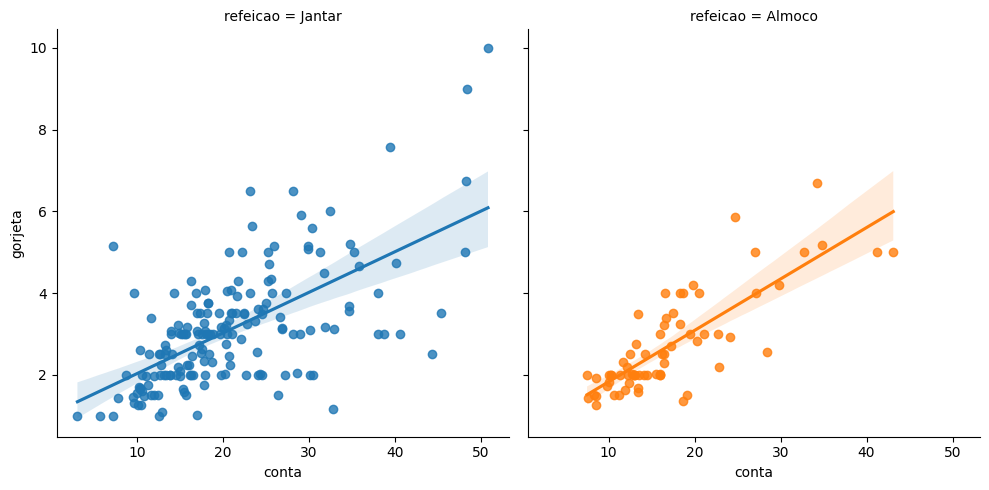

In [131]:
graficos_refeicoes = sns.lmplot(
    x='conta',
    y='gorjeta',
    col='refeicao',
    hue='refeicao',
    data=gorjetas
)

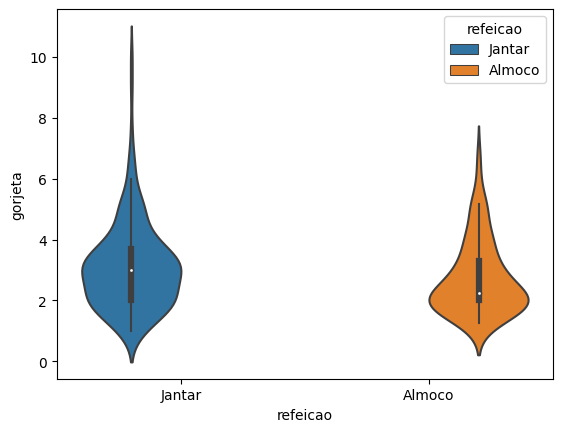

In [141]:
graficos_refeicoes = sns.violinplot(
    x='refeicao',
    y='gorjeta',
    hue='refeicao',
    data=gorjetas
)

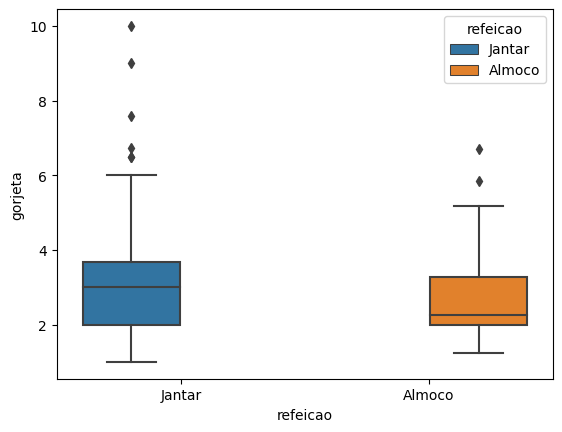

In [142]:
graficos_refeicoes = sns.boxplot(
    x='refeicao',
    y='gorjeta',
    hue='refeicao',
    data=gorjetas
)

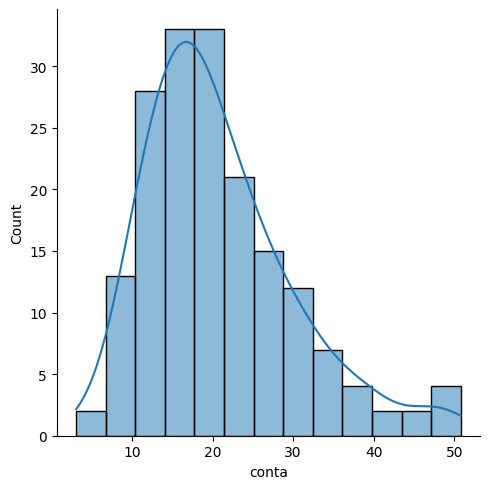

In [163]:
almoco = gorjetas.query("refeicao=='Almoco'").conta
janta = gorjetas.query("refeicao=='Jantar'").conta
graficos_refeicoes = sns.displot(janta, kde=True)